In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [4]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score
import pandas as pd

# Load the dataset (replace this with your actual dataset)
# Assuming the dataset is stored in a variable named df
# df = ...

# Split features and target variable
X = df.drop(columns=['Strength'])
y = df['Strength']

# Choose a regression model
model = LinearRegression()

# Define custom scorer for r2
scorer = make_scorer(r2_score)

# Define range of random states to try
random_states = range(100)

best_random_state = None
best_mean_r2 = -float('inf')

# Iterate over different random states
for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    
    # Compute mean R^2 score
    mean_r2 = cv_scores.mean()
    
    # Update the best random state and mean R^2 score if necessary
    if mean_r2 > best_mean_r2:
        best_random_state = random_state
        best_mean_r2 = mean_r2

print("Best random state:", best_random_state)
print("Best mean R^2 score:", best_mean_r2)


Best random state: 1
Best mean R^2 score: 0.6307134470651701


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']], df['Strength'], test_size=0.3, random_state = 1)

## Simple Linear Regression

In [6]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
y_pred_lr = linear_regression_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_lr)
accuracy_lr = linear_regression_model.score(x_test, y_test)
print("mse with linear regression:", mse_linear)
print("Accuracy:",round(accuracy_lr*100,2),"%")

mse with linear regression: 120.18125557536798
Accuracy: 54.15 %


## Polynimial Regression

Performing Cross Validation to check the <b>Optimal  Degree</b> for the PolynomialFeature

In [7]:
plynomial_mses = [] #empty array 
polynomial_degs = range(2, 6)

for deg in polynomial_degs:
    polynomial_reg = LinearRegression()
    poly = PolynomialFeatures(degree = deg)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    polynomial_reg.fit(x_train_poly, y_train)
    y_pred_poly = polynomial_reg.predict(x_test_poly)
    print(polynomial_reg.score(x_test_poly, y_test))
    poly_mse = mean_squared_error(y_test, y_pred_poly)
    plynomial_mses.append(poly_mse)

plynomial_mses

0.758827609806485
0.8077703572600525
-424.913987260286
-6508831.904250146


[63.21301967299293, 50.384773225917336, 111635.12222142942, 1706011961.3793652]

<b> Degree 3 is the optimal for this dataset <b>

## Polynomial Regression with Degree 3

In [8]:
polynomial_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=3)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
polynomial_reg.fit(x_train_poly, y_train)
y_pred_poly = polynomial_reg.predict(x_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
accuracy_poly = polynomial_reg.score(x_test_poly, y_test)
print("mse with polynomial regression:", mse_poly)
print("Accuracy:", round(accuracy_poly*100, 2),"%")

mse with polynomial regression: 50.384773225917336
Accuracy: 80.78 %


## Linear Regression with Lasso (Regularization)

In [9]:
lasso_reg = Lasso(alpha=0.1) # Tune alpha parameter
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
accuracy_lasso = lasso_reg.score(x_test, y_test)
print("mse with lasso regression:", mse_lasso)
print("Accuracy:", round(accuracy_lasso*100, 2),"%")

mse with lasso regression: 120.1531334118005
Accuracy: 54.16 %


## Linear Regression with Ridge (Regularizarion)

In [10]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
accuracy_ridge = ridge_reg.score(x_test, y_test)
print(f"mse with ridge regression: {mse_ridge}\naccuracy: {round(accuracy_ridge*100, 2)}%")

mse with ridge regression: 120.18124012654579
accuracy: 54.15%


## Plynomial Lasso Regression (Degree 3)

In [11]:
lasso_2 = Lasso(alpha=0.1)
lasso_2.fit(x_train_poly, y_train)
y_pred_lasso_2 = lasso_2.predict(x_test_poly)
mse_lasso_2 = mean_squared_error(y_test, y_pred_lasso_2)
accuracy_lasso_2 = lasso_2.score(x_test_poly, y_test)
print(f"mse with polynomial lasso regression: {mse_lasso_2}\naccuracy: {round(accuracy_lasso_2*100, 2)}%")

mse with polynomial lasso regression: 44.41187964030376
accuracy: 83.06%


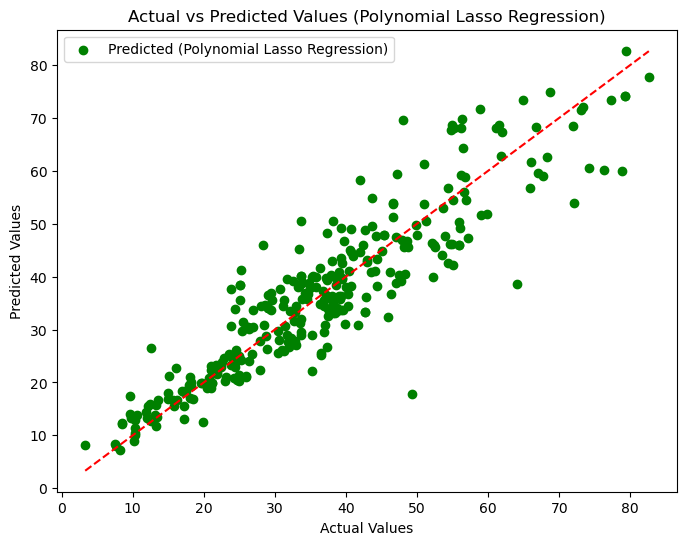

In [12]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for polynomial lasso regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso_2, color='green', label='Predicted (Polynomial Lasso Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Polynomial Lasso Regression)')
plt.legend()
plt.show()


## Polynomial Ridge Regression (Degree 3)

In [13]:
ridge_2 = Ridge(alpha=0.1)
ridge_2.fit(x_train_poly, y_train)
y_pred_ridge_2 = ridge_2.predict(x_test_poly)
mse_ridge_2 = mean_squared_error(y_test, y_pred_ridge_2)
accuracy_ridge_2 = ridge_2.score(x_test_poly, y_test)
print(f"mse with polynomial ridge regression: {mse_ridge_2}\naccuracy: {round(accuracy_ridge_2*100, 2)}%")

mse with polynomial ridge regression: 47.1672048934035
accuracy: 82.0%


## Polynomial Lasso Regression with Normalization (Degree 3)

In [14]:
norm_scaler = MinMaxScaler()
x_train_norm, x_test_norm = norm_scaler.fit_transform(x_train), norm_scaler.fit_transform(x_test)
xtrain_norm_poly, xtest_norm_poly = poly.fit_transform(x_train_norm), poly.fit_transform(x_test_norm)

lasso_3 = Lasso(alpha=0.1)
lasso_3.fit(xtrain_norm_poly, y_train)
y_pred_lasso_3 = lasso_3.predict(xtest_norm_poly)
mse_lasso_3 = mean_squared_error(y_test, y_pred_lasso_3)
accuracy_lasso_3 = lasso_3.score(xtest_norm_poly, y_test)
print(f"mse with polynomial lasso regression and normalization: {mse_lasso_3}\naccuracy: {round(accuracy_lasso_3*100, 2)}%")

mse with polynomial lasso regression and normalization: 95.05870613825203
accuracy: 63.73%


## Polynomial Lasso Regression with Standardization (Degree 3)


In [15]:
std_scaler = StandardScaler()
x_train_std, x_test_std = std_scaler.fit_transform(x_train), std_scaler.fit_transform(x_test)
xtrain_std_poly, xtest_std_poly = poly.fit_transform(x_train_std), poly.fit_transform(x_test_std)

lasso_4 = Lasso(alpha=0.1)
lasso_4.fit(xtrain_std_poly, y_train)
y_pred_lasso_4 = lasso_4.predict(xtest_std_poly)
mse_lasso_4 = mean_squared_error(y_test, y_pred_lasso_4)
accuracy_lasso_4 = lasso_4.score(xtest_std_poly, y_test)
print(f"mse with polynomial lasso regression and standardization: {mse_lasso_4}\naccuracy: {round(accuracy_lasso_4*100, 2)}%")

mse with polynomial lasso regression and standardization: 46.905312472993984
accuracy: 82.1%


## Polynomial Ridge Regression with Normalization (Degree 3)


In [16]:
ridge_3 = Ridge(alpha=0.1)
ridge_3.fit(xtrain_norm_poly, y_train)
y_pred_ridge_3 = ridge_3.predict(xtest_norm_poly)
mse_ridge_3 = mean_squared_error(y_test, y_pred_ridge_3)
accuracy_ridge_3 = ridge_3.score(xtest_norm_poly, y_test)
print(f"mse with polynomial ridge regression and normalization: {mse_ridge_3}\naccuracy: {round(accuracy_ridge_3*100, 2)}%")

mse with polynomial ridge regression and normalization: 47.10123139891343
accuracy: 82.03%


## Polynomial Ridge Regression with Standardization (Degree 3)


In [17]:
ridge_4 = Ridge(alpha=0.1)
ridge_4.fit(xtrain_std_poly, y_train)
y_pred_ridge_4 = ridge_4.predict(xtest_std_poly)
mse_ridge_4 = mean_squared_error(y_test, y_pred_ridge_4)
accuracy_ridge_4 = ridge_4.score(xtest_std_poly, y_test)
print(f"mse with polynomial ridge regression and standardization: {mse_ridge_4}\naccuracy: {round(accuracy_ridge_4*100, 2)}%")

mse with polynomial ridge regression and standardization: 4101.23475257131
accuracy: -1464.72%


<b>Plynomial Lasso Regression (Degree 3)</b> is the optimal model for this Dataset with an MSE of <b>44.41</b> and <b>83.06%</b> Accuracy

In [18]:
df_result = pd.DataFrame({'Strength': y_test, 'Predicted Strength': y_pred_poly})
df_result['Error(%)'] = round((abs(df_result['Strength']-df_result['Predicted Strength'])/df_result['Strength'])*100, 2)
df_result

,Strength,Predicted Strength,Error(%)
339,21.91,23.341219,6.53
244,19.93,14.188167,28.81
882,36.44,24.669127,32.30
567,11.96,12.694569,6.14
923,39.84,32.798424,17.67
...,...,...,...
1018,37.27,38.577055,3.51
1015,52.43,46.090021,12.09
341,47.40,41.594500,12.25
750,44.09,38.712660,12.20
